In [ ]:
#Python DVP A6 by Team-1_Datavana
#Team Members
#Revanth Madasu_999903540
#Anusha Pakkiru_999903534

#Use Case: Elite Party Services

In [1]:
import piplite # When using the JupyterLite web-based environment, an "import" statement is used to load a layer called "piplite" that is needed for installing specific session-based libraries inside of a wrapper.
await piplite.install("seaborn") # An "await" statement is used for installing (when/if later called on) a library for plotting called "seaborn" from within a piplite wrapper for use in a session within the JupyterLite web-based environment.

In [2]:
# Import required libraries
await piplite.install("openpyxl")
import seaborn as sns # For importing seaborn library for statistical data visualization and aesthetics enhancement as sns.
import pandas as pd # For importing pandas library for data manipulation and analysis as pd.
import numpy as np # For importing NumPy library for numerical computations and array operations as np.
import pandas.testing as tm # For importing a package called "testing" from a library called "pandas" for comparing groups (testing that dataframes match appropriately be able to compare them) and assigning it to a variable called "tm".
import matplotlib.pyplot as plt # For importing a module called "pyplot" from a library called "matplotlib" for plotting and assigning it to a variable called "plt".
from pandas.plotting import parallel_coordinates # For importing a module called "parallel_coordinates" from a library called "pandas" for creating parallel coordinates.

In [3]:
# Load a dataset of interest
M1 = pd.ExcelFile('1 - Elite Party Services - M1 - Initial dataset.xlsx')
M2 = pd.ExcelFile('1 - Elite Party Services - M2 - Change Over Time.xlsx')
M3 = pd.ExcelFile('1 - Elite Party Services - M3 - Data Composition.xlsx')
M4 = pd.ExcelFile('1 - Elite Party Services - M4 - Data Distributions.xlsx')
M5 = pd.ExcelFile('1 - Elite Party Services - M5 - Group Comparisons.xlsx')
M6 = pd.ExcelFile('1 - Elite Party Services - M6 - Relationships.xlsx')


M1_Data = pd.read_excel(M1, '1 - Elite Party Services - M1')
M2_Data = pd.read_excel(M2, '1 - Elite Party Services - M2')
M3_Data = pd.read_excel(M3, '1 - Elite Party Services - M3')
M4_Data = pd.read_excel(M4, '1 - Elite Party Services - M4')
M5_Data = pd.read_excel(M5, '1 - Elite Party Services - M5')
M6_Data = pd.read_excel(M6, '1 - Elite Party Services - M6')


M1_M2 = pd.merge(M1_Data, M2_Data, on="ID")
M1_M2_M3 = pd.merge(M1_M2, M3_Data, on="ID")
M1_M2_M3_M4 = pd.merge(M1_M2_M3, M4_Data, on="ID")
M1_M2_M3_M4_M5 = pd.merge(M1_M2_M3_M4, M5_Data, on="ID")
M1_M2_M3_M4_M5_M6 = pd.merge(M1_M2_M3_M4_M5, M6_Data, on="ID")


M1_DD = pd.read_excel(M1, 'Data Dictionary')
M2_DD = pd.read_excel(M2, 'Data Dictionary')
M3_DD = pd.read_excel(M3, 'Data Dictionary')
M4_DD = pd.read_excel(M4, 'Data Dictionary')
M5_DD = pd.read_excel(M5, 'Data Dictionary')
M6_DD = pd.read_excel(M6, 'Data Dictionary')

df = M1_M2_M3_M4_M5_M6

In [4]:
# See what variables (columns) are in the dataset and inspect for any oddities.
df.head() # Use a function called "head()" to show the first five rows of a dataset that was assigned to a variable called "df".

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Date,Q8,...,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47
0,1,4,1,9,23,4,1,1,2022-08-18,1,...,4,1,0,1,0,1,0,0,1,1
1,2,2,2,5,24,4,2,8,2022-05-01,-1,...,1,2,1,1,1,1,0,0,1,2
2,3,4,1,9,19,3,9,1,2022-02-19,-1,...,2,1,1,0,0,0,0,0,-1,2
3,4,4,1,9,20,3,2,8,2022-11-05,-2,...,1,-2,0,0,1,0,0,0,-2,-2
4,5,3,1,6,24,4,9,1,2022-09-29,1,...,3,1,1,0,0,1,0,0,1,2


In [ ]:
# Space intentionally blank to separate sections.

In [ ]:
# Space intentionally blank to separate sections.

In [ ]:
# The next few code blocks are for doing some required data processing with the above dataset so that we can make data visualizations that show relationships.

In [5]:
# Make a new data frame with only selected variables of interest from the dataset.
df_ethnicity_food = df[['Q3', 'Q40','Q41','Q42','Q43','Q44','Q45']].copy() # Use the copy() function to create a new data frame called "df_ethnicity_food" by copying selected columns from the already-existing data frame called "df".
print(df_ethnicity_food) # Use the print() function to view the first five and last five rows of the data frame.

     Q3  Q40  Q41  Q42  Q43  Q44  Q45
0     9    0    1    0    1    0    0
1     5    1    1    1    1    0    0
2     9    1    0    0    0    0    0
3     9    0    0    1    0    0    0
4     6    1    0    0    1    0    0
..   ..  ...  ...  ...  ...  ...  ...
148   8    1    1    0    0    0    0
149   4    1    1    0    1    0    0
150   5    0    1    0    1    1    0
151   4    0    0    0    1    1    0
152   5    0    1    0    1    0    0

[153 rows x 7 columns]


In [6]:
# Along with using the round() function of numpy to designate the number of decimals desired to be in a resultant set of numbers, use the pivot_table() function to create a pivot table to group the data of a designated data frame by a categorical (nominal) variable of interest and to add an argument called aggfunc to desigante the desire is to show the average exam scores for each group contained in a values list; assign the pivot table to a variable called "pivot".
pivot = np.round(df.pivot_table(index =['Q3'],
                       values =['Q40','Q41','Q42','Q43','Q44','Q45'],
                       aggfunc ='sum'))
print(pivot) # Use the print() function to view the entire contents of the new pivot table.

    Q40  Q41  Q42  Q43  Q44  Q45
Q3                              
1     1    3    1    2    1    0
2     3    7    5    5    2    2
3     9    9    3    7    2    3
4     5    4    3    6    1    0
5    16   23   12   10    1    6
6     4    4    1    4    2    1
7     1    1    1    0    0    0
8     4    5    1    5    1    0
9    10   18    7   15    3    3
10   34   44   10   25    3    5
11    0    1    0    2    1    0


In [7]:
# Convert the pivot table to a new data frame so that we can optimize it for data visualization.
dietary_preference_by_ethnicity = pivot.reset_index() # Use the reset_index() function to ensure that the new data frame is optmized for data visualization (in this example, we want it to use our Ethnicity column, which is the first column in our data frame).
dietary_preference_by_ethnicity # Call the new "performance_by_ethnicity" dataframe to see if the contents look correctly generated.
new_column_names = {
    "Q40": "Beef",
    "Q41": "Poultry",
    "Q42": "Pork",
    "Q43": "Vegetarian",
    "Q44": "Vegan",
    "Q45": "Other"
}
dietary_preference_by_ethnicity_cpy = dietary_preference_by_ethnicity.rename(columns=new_column_names)
dietary_preference_by_ethnicity_cpy

,Q3,Beef,Poultry,Pork,Vegetarian,Vegan,Other
0,1,1,3,1,2,1,0
1,2,3,7,5,5,2,2
2,3,9,9,3,7,2,3
3,4,5,4,3,6,1,0
4,5,16,23,12,10,1,6
5,6,4,4,1,4,2,1
6,7,1,1,1,0,0,0
7,8,4,5,1,5,1,0
8,9,10,18,7,15,3,3
9,10,34,44,10,25,3,5


In [ ]:
# Space intentionally blank to separate sections.

In [ ]:
# Space intentionally blank to separate sections.

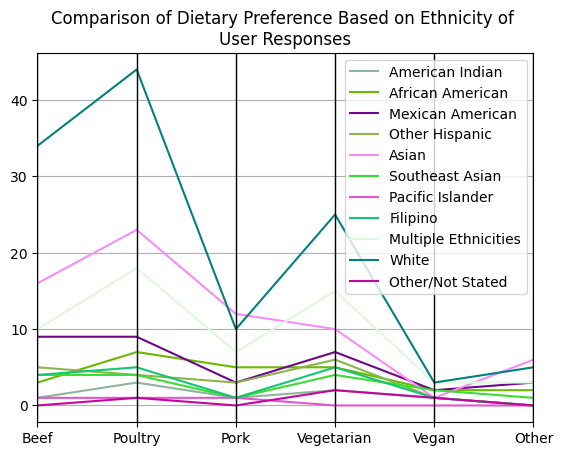

In [8]:
# Create the basic structure for a Parallel Coordinates plot using your new specialized data frame that you created above and add some customization components.
parallel_coordinates(dietary_preference_by_ethnicity_cpy, 'Q3') # Designate custom colors for each category of the chosen group variable in the order in which you want them to be used. You could also choose a different categorical variable (nominal level of measurement) from the dataset if you wanted to or needed to.
plt.title("Comparison of Dietary Preference Based on Ethnicity of \nUser Responses") # Use the title() function of matplotlib to add an optimal customized title to your DV (the "\n" will designate the text that follows it to be positioned on a new line).
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # Use the legend() function of matplotlib to move the legend outside of the plot so that we can see all of the lines in the chart. You can adjust the values to fine-tune its position.
plt.legend(labels = ["American Indian", "African American", "Mexican American", "Other Hispanic", "Asian", "Southeast Asian", "Pacific Islander", "Filipino", "Multiple Ethnicities", "White", "Other/Not Stated"])
plt.savefig("DietaryPreferenceEthnicity-ParallelCoordinatesPlot-Python.png") # Use the savefig() function of matplotlib to save the DV to a file called "StudentsPerformance-ParallelCoordinatesPlot-Python.png". If any text on your DV is cut off in your saved image, use the "right-click, copy output to clipboard, paste" method to insert DVs into assignment or reports.
plt.show() # To show the chart. You don't always need this; it depends on the development environment.
# Explore the source from which this code was adapted: https://www.kaggle.com/code/crklausenburg/multivariate
# Experiment with customizing your parallel coordinates plot: https://www.python-graph-gallery.com/parallel-plot/
# Experiment with customizing your colors by choosing different "Named Colors" from: https://matplotlib.org/stable/gallery/color/named_colors.html

In [ ]:
# Space intentionally blank to separate sections.

In [ ]:
# Space intentionally blank to separate sections.

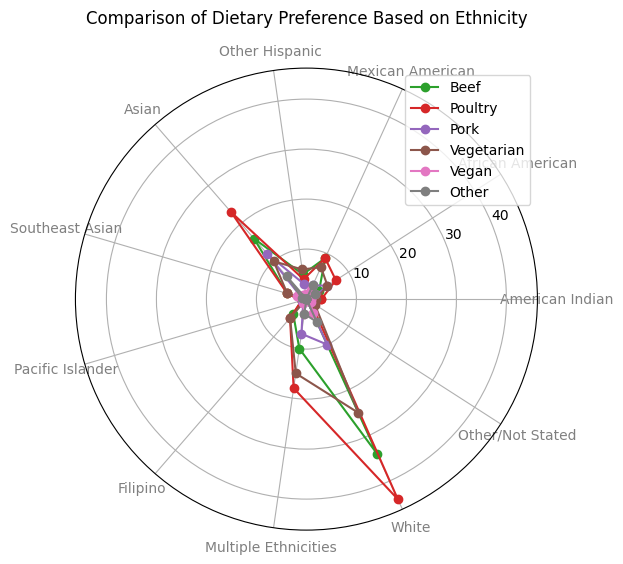

In [9]:
# Create the basic structure for a Radar Chart (Polar Chart) and add some customization components.
fig = plt.figure(figsize=(8,6)) # Use the figure() function from matplotlib to create the figure object. Add an argument for manually adjusting the figure size.
ax = fig.add_subplot(111, projection="polar") # Use the add_subplot() function to add the polar projection grid to the figure.
theta = np.arange(len(dietary_preference_by_ethnicity) + 1) / float(len(dietary_preference_by_ethnicity)) * 2 * np.pi # The theta parameter of the polar coordinate system that defines the angle from the axis.
values1 = dietary_preference_by_ethnicity['Q40'].values # Designate a variable (column from the data frame) to be the first (inner-most) plotted line on the chart.
values1 = np.append(values1, values1[0]) # Use the append() function to add the data that you defined to be the first inner-most variable to the end of an array.
values2 = dietary_preference_by_ethnicity['Q41'].values # Designate a second variable (column from the data frame) to be the second-from-center plotted line on the chart.
values2 = np.append(values2, values2[0]) # Use the append() function to add the data that you defined to be the second-from-center variable to the end of an array.
values3 = dietary_preference_by_ethnicity['Q42'].values # Designate a third variable (column from the data frame) to be the third-from-center plotted line on the chart.
values3 = np.append(values3, values3[0]) # Use the append() function to add the data that you defined to be the third-from-center variable to the end of an array.
values4 = dietary_preference_by_ethnicity['Q43'].values # Designate a variable (column from the data frame) to be the first (inner-most) plotted line on the chart.
values4 = np.append(values4, values4[0]) # Use the append() function to add the data that you defined to be the first inner-most variable to the end of an array.
values5 = dietary_preference_by_ethnicity['Q44'].values # Designate a second variable (column from the data frame) to be the second-from-center plotted line on the chart.
values5 = np.append(values5, values5[0]) # Use the append() function to add the data that you defined to be the second-from-center variable to the end of an array.
values6 = dietary_preference_by_ethnicity['Q45'].values # Designate a third variable (column from the data frame) to be the third-from-center plotted line on the chart.
values6 = np.append(values6, values6[0]) # Use the append() function to add the data that you defined to be the third-from-center variable to the end of an array.
# Draw the polygon, mark the points for each angle/value combination, and add a customized label for each variable to show up on the DV.
l1, = ax.plot(theta, values1, color="C2", marker="o", label="Beef") # This will be the contents of the inner-most line on the chart.
l2, = ax.plot(theta, values2, color="C3", marker="o", label="Poultry") # This will be the contents of the second-from-center line on the chart.
l3, = ax.plot(theta, values3, color="C4", marker="o", label="Pork") # This will be the contents of the third-from-center line on the chart.
l4, = ax.plot(theta, values4, color="C5", marker="o", label="Vegetarian") # This will be the contents of the inner-most line on the chart.
l5, = ax.plot(theta, values5, color="C6", marker="o", label="Vegan") # This will be the contents of the second-from-center line on the chart.
l6, = ax.plot(theta, values6, color="C7", marker="o", label="Other") # This will be the contents of the third-from-center line on the chart.
custom_labels = ["American Indian", "African American", "Mexican American", "Other Hispanic", "Asian", 
                 "Southeast Asian", "Pacific Islander", "Filipino", "Multiple Ethnicities", "White", 
                 "Other/Not Stated"]
plt.xticks(theta[:-1], custom_labels, color='grey', size=10) # Use the xticks() function of matplotlib to adjust the location of x axis ticks and adjust the font size and color.
#ax.tick_params(pad=10) # Use the ax.tick_params() function of matplotlib to adjust the distance of the axes tick labels from the plot.
#ax.set_ylim(50) # Use the ax.set_ylim() function of matplotlib to set a new min of the y-axes (instead of zero); you can experiment with this.

# Optional customizations to go in this section
# Fill the area of the polygon with green, red, purple, and some transparency
#ax.fill(theta, values1, 'green', alpha=0.05) # Uncomment this code line by removing only the first # at the beginning if you want to fill the polygons of your radar chart. Experiment with the transparency level.
#ax.fill(theta, values2, 'red', alpha=0.05) # Uncomment this code line by removing only the first # at the beginning if you want to fill the polygons of your radar chart. Experiment with the transparency level.
#ax.fill(theta, values3, 'purple', alpha=0.05) # Uncomment this code line by removing only the first # at the beginning if you want to fill the polygons of your radar chart. Experiment with the transparency level.

ax.set_title("Comparison of Dietary Preference Based on Ethnicity", pad=15) # Use the ax.set_title() function of matplotlib to adjust the position of the title to ensure that there is enough space between it and the chart.
#plt.title("Comparison of Average Exam Performance Based on Ethnicity of Tested Student Population\n(masked ethnicity categories)").set_position([0.5, 1.10]) # In some development environments, the above line doesn't work and this one does (and vice versa). If you need to use this line uncomment it by removing only the first # at the beginning.
plt.legend(loc="best") # Use the legend() function of matplotlib to show the legend, using the labels you designated above (only when you are showing more than 1 polygon).
plt.savefig("DietaryPreferencesRadar-RadarChart-Python.png") # Use the savefig() function of matplotlib to save the DV to a file called "StudentsPerformance-RadarChart-Python.png". If any text on your DV is cut off in your saved image, use the "right-click, copy output to clipboard, paste" method to insert DVs into assignment or reports.
plt.show() # Use the show() function of matplotlib to show the chart. You don't always need this; it depends on the development environment.

# Explore the source from which this code was adapted: https://stackoverflow.com/questions/60231146/how-can-i-turn-my-dataframe-into-a-radar-chart-using-python
# Experiment with customizing your radar chart: https://www.python-graph-gallery.com/390-basic-radar-chart

# For advanced students, if you want to try to make an interactive radar or polar chart with plotly:
# https://plotly.com/python/radar-chart/
# https://plotly.com/python/polar-chart/

In [ ]:
# Space intentionally blank to separate sections.

In [10]:
M1_DD_T = M1_DD.T
M2_DD_T = M2_DD.T
M3_DD_T = M3_DD.T
M4_DD_T = M4_DD.T
M5_DD_T = M5_DD.T
M6_DD_T = M6_DD.T

pd.set_option('display.max_colwidth', None)
M6_DD_T

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
ID,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,...,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47
ResponseID,Ranking of most valued characteristic of a party services company: Ablity to get things done,Ranking of most valued characteristic of a party services company: Creativity,Ranking of most valued characteristic of a party services company: Business Connections,Ranking of most valued characteristic of a party services company: Personality of staff,Ranking of most valued characteristic of a party services company: Price,Ranking of most valued characteristic of a party planner: Availability,Ranking of importance of party component: Venue,Ranking of importance of party component: Drinks,Ranking of importance of party component: Music,Ranking of importance of party component: Party favors,...,Time per week willing to dedicate towards planning party?,How important to you are the opinions of family and friends regarding the planning of your party?,Dietary preferences (selected or not selected): Beef,Dietary preferences (selected or not selected): Poultry,Dietary preferences (selected or not selected): Pork,Dietary preferences (selected or not selected): Vegetarian,Dietary preferences (selected or not selected): Vegan,Dietary preferences (selected or not selected): Other,I want my party to be very unique.,I want to be involved in every aspect of the planning of my party.
Unnamed: 2,Most important (1),Most important (1),Most important (1),Most important (1),Most important (1),Most important (1),Most important (1),Most important (1),Most important (1),Most important (1),...,Less than 5 hours (1),Very unimportant (-2),Checked box (1),Checked box (1),Checked box (1),Checked box (1),Checked box (1),Checked box (1),Strongly disagree (-2),Strongly disagree (-2)
Unnamed: 3,2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),2nd most important (2),...,6 to 10 hours (2),Unimportant (-1),Did not check box (0 or blank),Did not check box (0 or blank),Did not check box (0 or blank),Did not check box (0 or blank),Did not check box (0 or blank),Did not check box (0 or blank),Disagree (-1),Disagree (-1)
Unnamed: 4,3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),3rd most important (3),...,11 to 15 hours (3),Unsure (0),NaN,NaN,NaN,NaN,NaN,NaN,Unsure (0),Unsure (0)
Unnamed: 5,4th most important (4),4th most important (4),4th most important (4),4th most important (4),4th most important (4),4th most important (4),4th most important (4),4th most important (4),4th most important (4),4th most important (4),...,16 to 20 hours (4),Important (1),NaN,NaN,NaN,NaN,NaN,NaN,Agree (1),Agree (1)
Unnamed: 6,5th most important (5),5th most important (5),5th most important (5),5th most important (5),5th most important (5),5th most important (5),5th most important (5),5th most important (5),5th most important (5),5th most important (5),...,21 hours or more (5),Very important (2),NaN,NaN,NaN,NaN,NaN,NaN,Strongly agree (2),Strongly agree (2)
Unnamed: 7,6th most important (6),6th most important (6),6th most important (6),6th most important (6),6th most important (6),6th most important (6),6th most important (6),6th most important (6),6th most important (6),6th most important (6),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,7th most important (7),7th most important (7),7th most important (7),7th most important (7),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,8th most important (8),8th most important (8),8th most important (8),8th most important (8),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
scatter = M1_M2_M3_M4_M5_M6[['Q22','Q23', 'Q26', 'Q27','Q28','Q32']].copy()

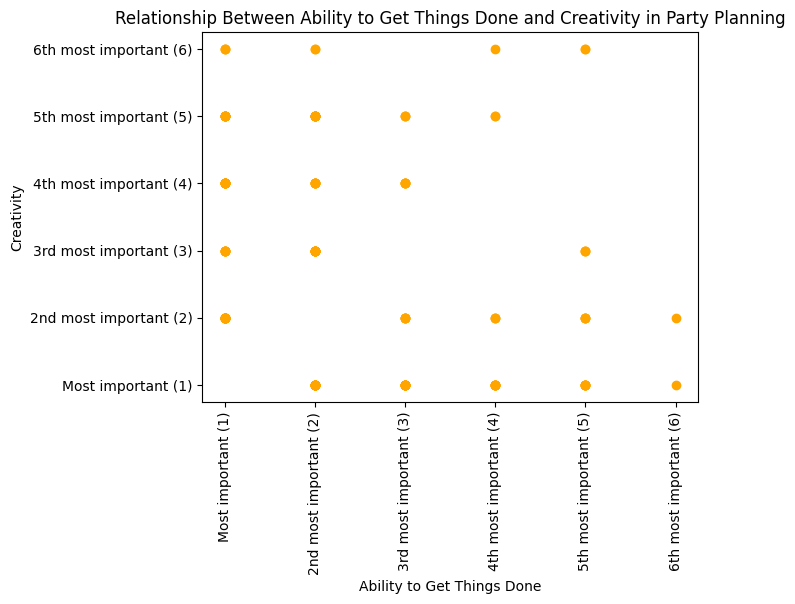

In [52]:
x = M1_M2_M3_M4_M5_M6['Q22']  
y = M1_M2_M3_M4_M5_M6['Q23']  


labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)", "6th most important (6)"]
# y_labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)", "6th most important (6)"]

plt.xticks(range(1, 7), labels, rotation=90)
plt.yticks(range(1, 7), labels)

plt.scatter(x, y, c="orange")
plt.xlabel("Ability to Get Things Done")
plt.ylabel("Creativity")
plt.title("Relationship Between Ability to Get Things Done and Creativity in Party Planning")
plt.savefig("Ability_to_Get_Things_Done_vs_Creativity_Scatter_Plot.png")
plt.show()

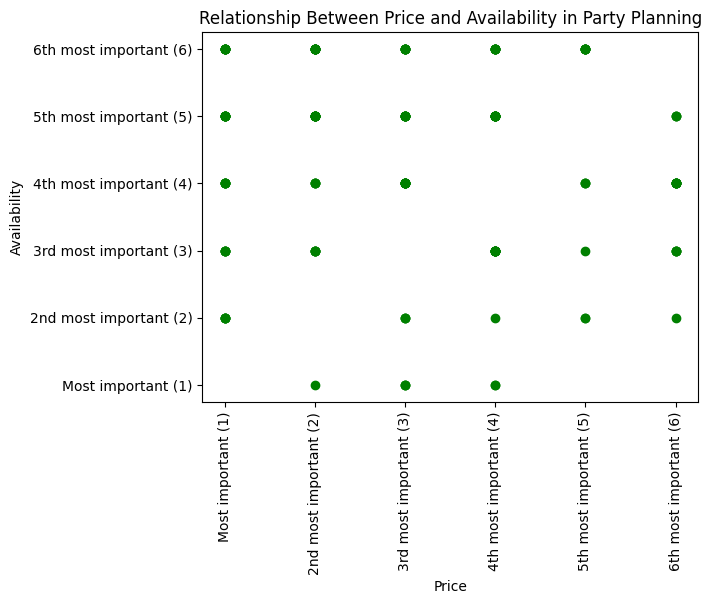

In [53]:
x = M1_M2_M3_M4_M5_M6['Q26'] 
y = M1_M2_M3_M4_M5_M6['Q27']  


# x_labels = ["Less than 5 hours (1)", "6 to 10 hours (2)", "11 to 15 hours (3)", "16 to 20 hours (4)", "21 hours or more (5)"]
labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)", "6th most important (6)"]


plt.xticks(range(1, 7), labels, rotation=90)
plt.yticks(range(1, 7), labels)

plt.scatter(x, y, c="green")
plt.xlabel("Price")
plt.ylabel("Availability")
plt.title("Relationship Between Price and Availability in Party Planning")
plt.savefig("Price_vs_Availability_Scatter_Plot.png")
plt.show()

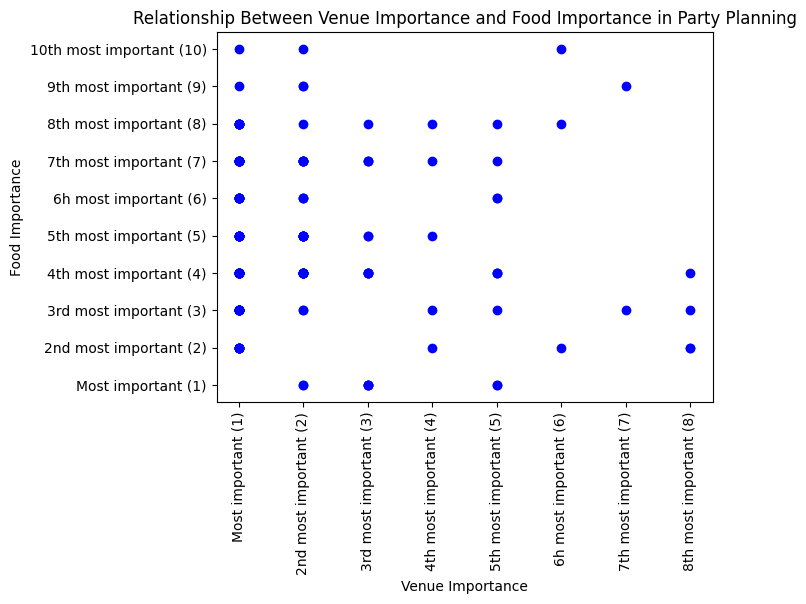

In [54]:
x = M1_M2_M3_M4_M5_M6['Q28']  
y = M1_M2_M3_M4_M5_M6['Q32']  

labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)", "6h most important (6)", "7th most important (7)", "8th most important (8)", "9th most important (9)", "10th most important (10)"]
# y_labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)"]

plt.xticks(range(1, 11), labels, rotation=90)
plt.yticks(range(1, 11), labels)

plt.scatter(x, y, c="blue")
plt.xlabel("Venue Importance")
plt.ylabel("Food Importance")
plt.title("Relationship Between Venue Importance and Food Importance in Party Planning")
plt.savefig("Venue_Importance_vs_Food_Importance_Scatter_Plot.png")
plt.show()

In [55]:
scatter.corr()

,Q22,Q23,Q26,Q27,Q28,Q32
Q22,1.000000,-0.236897,-0.161435,-0.127646,0.132409,0.013090
Q23,-0.236897,1.000000,-0.416045,-0.235057,0.240661,-0.112771
Q26,-0.161435,-0.416045,1.000000,-0.080689,-0.181251,0.180210
Q27,-0.127646,-0.235057,-0.080689,1.000000,-0.143281,0.011535
Q28,0.132409,0.240661,-0.181251,-0.143281,1.000000,-0.079480
Q32,0.013090,-0.112771,0.180210,0.011535,-0.079480,1.000000


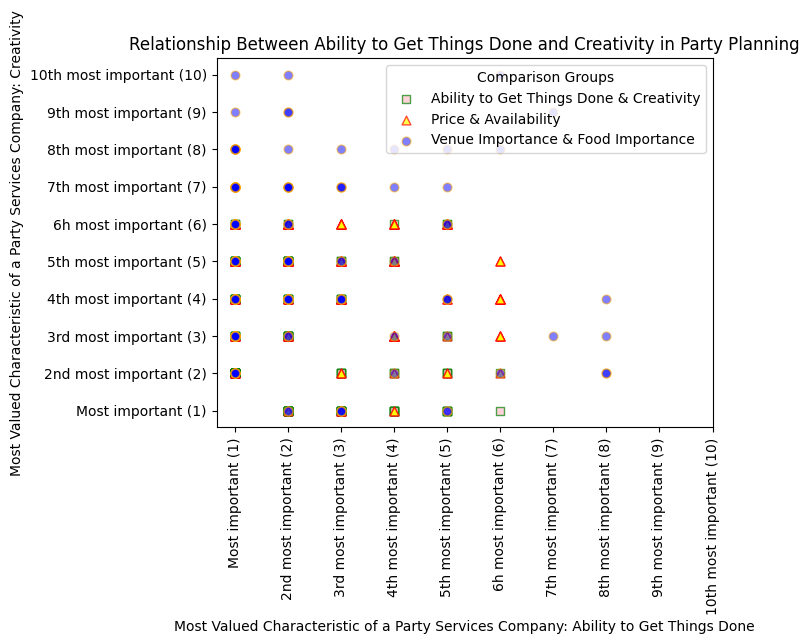

In [56]:

x = M1_M2_M3_M4_M5_M6['Q22']  
y = M1_M2_M3_M4_M5_M6['Q23']  
labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)", "6h most important (6)", "7th most important (7)", "8th most important (8)", "9th most important (9)", "10th most important (10)"]
# y_labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)"]

plt.scatter(x, y, c="pink", label="Ability to Get Things Done & Creativity", linewidths=1, marker="s", edgecolor="green", alpha=0.7, s=40)

x = M1_M2_M3_M4_M5_M6['Q26']  
y = M1_M2_M3_M4_M5_M6['Q27'] 
# x_labels = ["Less than 5 hours (1)", "6 to 10 hours (2)", "11 to 15 hours (3)", "16 to 20 hours (4)", "21 hours or more (5)"]
# y_labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)"]

plt.scatter(x, y, c="yellow", label="Price & Availability", linewidths=1, marker="^", edgecolor="red", alpha=0.7, s=40)

x = M1_M2_M3_M4_M5_M6['Q28']  
y = M1_M2_M3_M4_M5_M6['Q32'] 
x_labels = ["Most important (1)", "2nd most important (2)", "3rd most important (3)", "4th most important (4)", "5th most important (5)"]

plt.scatter(x, y, c="blue", label="Venue Importance & Food Importance", linewidths=1, marker="o", edgecolor="orange", alpha=0.5, s=40)

plt.xticks(range(1, 11), labels, rotation=90)
plt.yticks(range(1, 11), labels)

plt.xlabel("Most Valued Characteristic of a Party Services Company: Ability to Get Things Done")
plt.ylabel("Most Valued Characteristic of a Party Services Company: Creativity")
plt.title("Relationship Between Ability to Get Things Done and Creativity in Party Planning")
plt.legend(loc="best", title="Comparison Groups")

# Save and show the plot
plt.savefig("Ability_to_Get_Things_Done_and_Creativity_Scatter_Plot.png")
plt.show()


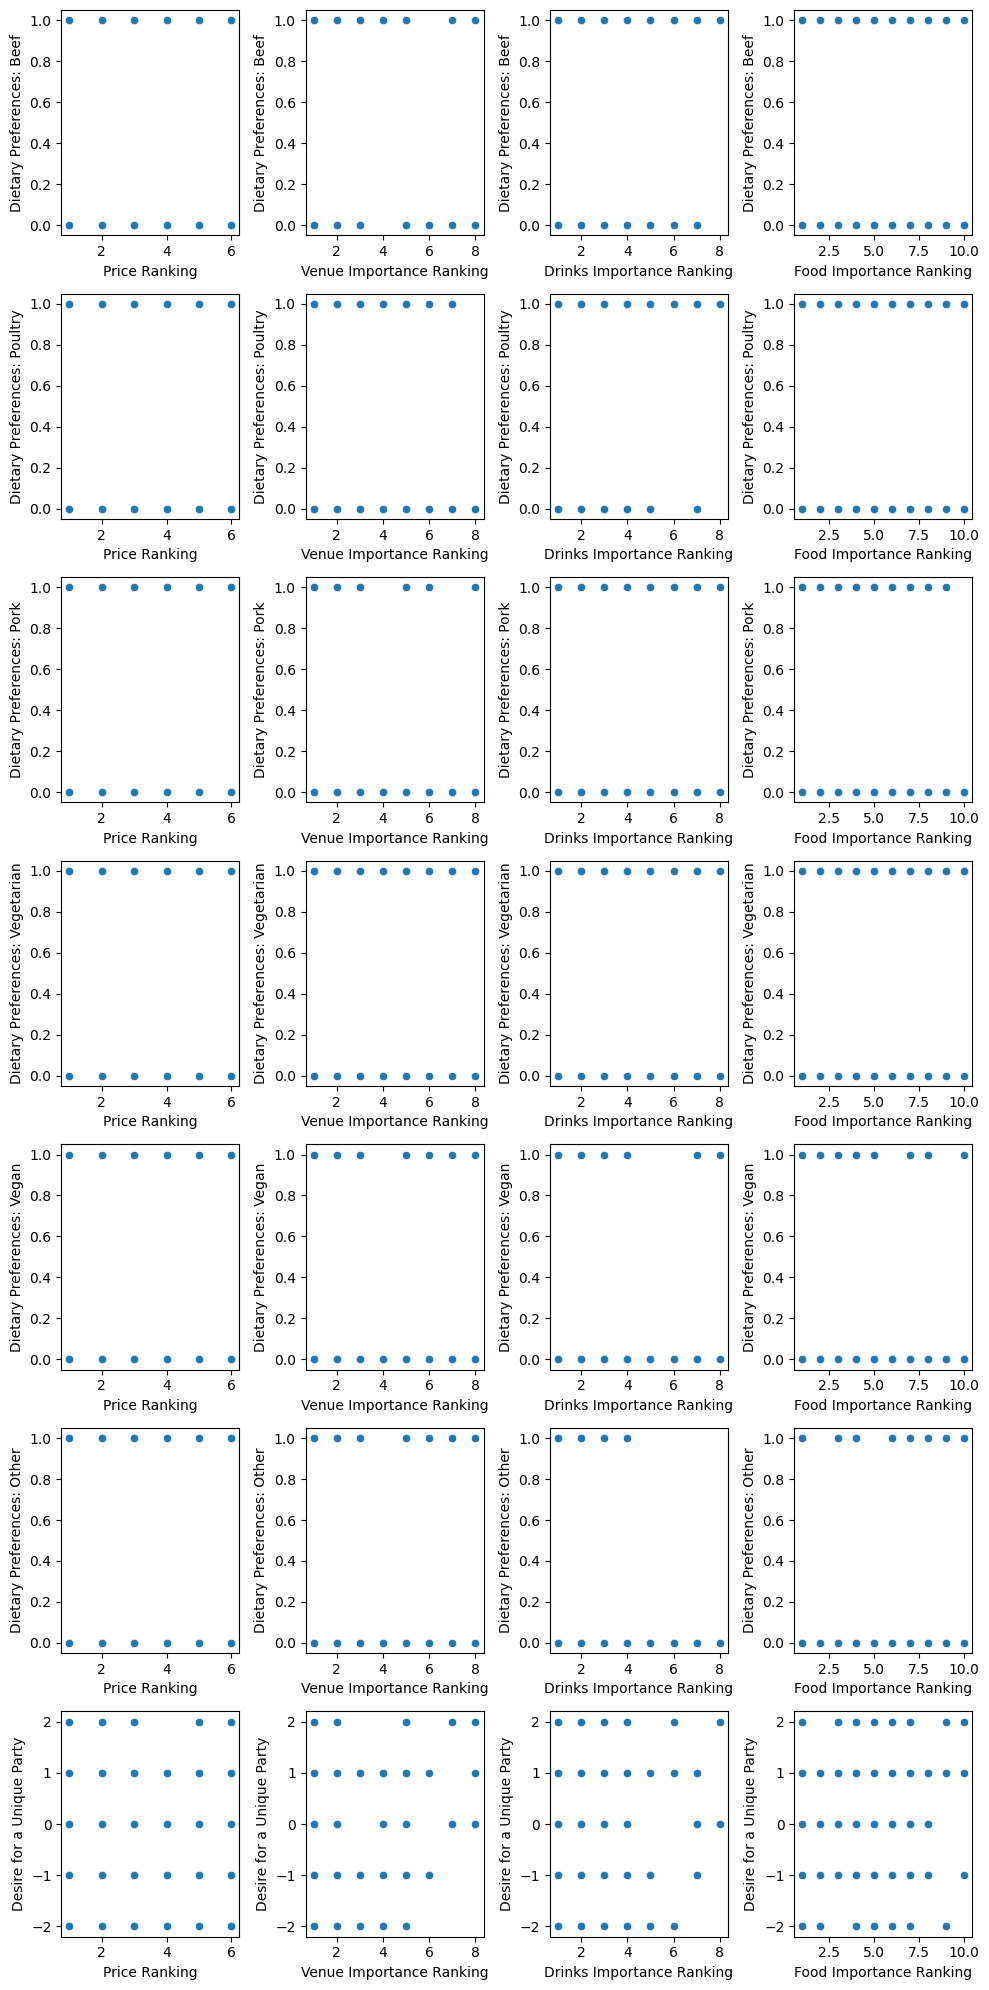

In [57]:
cat_cols = [
    ('Dietary Preferences: Beef', 'Q40'),
    ('Dietary Preferences: Poultry', 'Q41'),
    ('Dietary Preferences: Pork', 'Q42'),
    ('Dietary Preferences: Vegetarian', 'Q43'),
    ('Dietary Preferences: Vegan', 'Q44'),
    ('Dietary Preferences: Other', 'Q45'),
    ('Desire for a Unique Party', 'Q46'),
]

num_cols = [
    ('Price Ranking', 'Q26'),
    ('Venue Importance Ranking', 'Q28'),
    ('Drinks Importance Ranking', 'Q29'),
    ('Food Importance Ranking', 'Q32'),
]

# Create scatter plots
fig, ax = plt.subplots(figsize=(10, 20), nrows=len(cat_cols), ncols=len(num_cols))

for i, (num_label, num_col) in enumerate(num_cols):
    for j, (cat_label, cat_col) in enumerate(cat_cols):
        sns.scatterplot(data=M1_M2_M3_M4_M5_M6, x=num_col, y=cat_col, ax=ax[j, i])
        ax[j, i].set_xlabel(num_label)
        ax[j, i].set_ylabel(cat_label)

plt.tight_layout()
plt.show()
